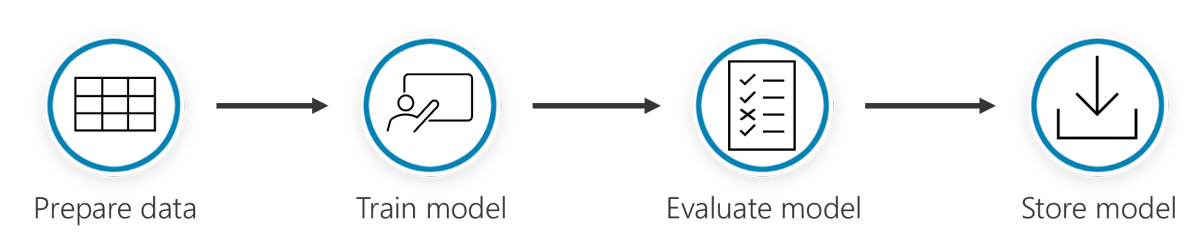

# Create Worspace Instance

In [34]:
from azureml.core import Workspace

In [35]:
ws=Workspace.from_config()

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
import pandas as pd

In [38]:
import numpy as np

In [39]:
data=pd.read_csv("data/diabetes.csv")

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(["Outcome"],axis=1),data["Outcome"])

In [42]:
train_data=pd.concat([X_train,y_train],axis=1)

In [43]:
train_data.to_csv("data/train_data.csv")

In [44]:
test_data=pd.concat([X_test,y_test],axis=1)

In [45]:
test_data.to_csv("data/test_data.csv")

# Uploading Files to the Storage(Blob container)

In [46]:
dstore=ws.get_default_datastore()

In [50]:
dstore.upload_files(files=["data/train_data.csv"],target_path="/diabetes_data/train",overwrite=True,show_progress=True)

Uploading an estimated of 1 files
Uploading data/train_data.csv
Uploaded data/train_data.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_cec88d19d514420ca9d145428d474d98

In [51]:
dstore.upload_files(files=["data/test_data.csv"],target_path="/diabetes_data/test",overwrite=True,show_progress=True)

Uploading an estimated of 1 files
Uploading data/test_data.csv
Uploaded data/test_data.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_7400e7d8da2c461e87a96cbe0f811710

# Registering Dataset

In [52]:
from azureml.core import Dataset

In [60]:
file_paths=[(dstore,"/diabetes_data/train/train_data.csv")]

In [61]:
train_data=Dataset.Tabular.from_delimited_files(path=file_paths)

In [62]:
train_data

{
  "source": [
    "('workspaceblobstore', '/diabetes_data/train/train_data.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ]
}

In [63]:
train_data.to_pandas_dataframe()

,Column1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,719,5,97,76,27,0,35.6,0.378,52,1
1,239,0,104,76,0,0,18.4,0.582,27,0
2,200,0,113,80,16,0,31.0,0.874,21,0
3,638,7,97,76,32,91,40.9,0.871,32,1
4,141,5,106,82,30,0,39.5,0.286,38,0
...,...,...,...,...,...,...,...,...,...,...
571,640,0,102,86,17,105,29.3,0.695,27,0
572,631,0,102,78,40,90,34.5,0.238,24,0
573,236,7,181,84,21,192,35.9,0.586,51,1
574,473,7,136,90,0,0,29.9,0.210,50,0


In [64]:
train_data.register(ws,name="diabetes_train_data")

{
  "source": [
    "('workspaceblobstore', '/diabetes_data/train/train_data.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ],
  "registration": {
    "id": "807b7669-4088-48af-8d5d-fd298c9c5763",
    "name": "diabetes_train_data",
    "version": 1,
    "workspace": "Workspace.create(name='eclerxml', subscription_id='a8b508b6-da16-4c45-84f5-cac5c9f57513', resource_group='azure-mlops')"
  }
}

In [65]:
test_data=Dataset.Tabular.from_delimited_files(path=[(dstore,"diabetes_data/test/test_data.csv")])

In [66]:
test_data.to_pandas_dataframe()

,Column1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,721,1,114,66,36,200,38.1,0.289,21,0
1,348,3,99,62,19,74,21.8,0.279,26,0
2,733,2,106,56,27,165,29.0,0.426,22,0
3,612,7,168,88,42,321,38.2,0.787,40,1
4,472,0,119,66,27,0,38.8,0.259,22,0
...,...,...,...,...,...,...,...,...,...,...
187,627,0,132,78,0,0,32.4,0.393,21,0
188,79,2,112,66,22,0,25.0,0.307,24,0
189,317,3,182,74,0,0,30.5,0.345,29,1
190,215,12,151,70,40,271,41.8,0.742,38,1


In [67]:
test_data.register(ws,name="diabetes_test_data")

{
  "source": [
    "('workspaceblobstore', 'diabetes_data/test/test_data.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ],
  "registration": {
    "id": "77c4d893-a042-4f47-9c8b-46dce445c2a1",
    "name": "diabetes_test_data",
    "version": 1,
    "workspace": "Workspace.create(name='eclerxml', subscription_id='a8b508b6-da16-4c45-84f5-cac5c9f57513', resource_group='azure-mlops')"
  }
}

In [72]:
from azureml.core import Dataset
train_data=Dataset.get_by_name(ws,name="diabetes_train_data")

In [73]:
train_data=train_data.to_pandas_dataframe()

In [74]:
X_train,y_train=train_data.drop(["Outcome"],axis=1),train_data["Outcome"]

# Model Training

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr=LinearRegression()

In [78]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf=RandomForestRegressor(n_estimators=550,min_samples_split=5)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=550, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
from sklearn.svm import SVR

In [100]:
svr=SVR(kernel="rbf",degree=5,C=0.5)

In [101]:
svr.fit(X_train,y_train)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Model Selection

In [104]:
from sklearn.model_selection import cross_val_score

In [121]:

models=[lr,rf,svr]

In [122]:
models_li=["lr","rf","svr"]
scores_df={}

In [123]:
models_li

['lr', 'rf', 'svr']

In [124]:
for i in range(len(models)):
    scores_df[models_li[i]]=cross_val_score(models[i],X_train,y_train,cv=4,n_jobs=-1)

In [125]:
scores_df

{'lr': array([0.24073948, 0.2246016 , 0.32914604, 0.34130346]),
 'rf': array([0.19065813, 0.17371508, 0.36001013, 0.38081677]),
 'svr': array([0.13246281, 0.10099398, 0.23909463, 0.03493133])}

In [126]:
scores_df["lr"].mean()

0.2839476429324038

In [127]:
scores_df["svr"].mean()

0.12687068768627338

In [128]:
scores_df["rf"].mean()

0.27630002970043155

# Hyper Parameter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV

In [139]:
params={
    "kernel":["rbf","poly"], "C":[0.1,0.5,1],"epsilon":[0.1,0.2]
}

In [140]:
grid=GridSearchCV(svr,param_grid=params,scoring="neg_mean_absolute_error",cv=4)

In [141]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVR(C=0.5, cache_size=200, coef0=0.0, degree=5,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1], 'epsilon': [0.1, 0.2],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [142]:
grid.best_params_

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

In [148]:
grid.best_score_

-0.339521922588273

# Experiment Logging

In [145]:
from azureml.core import Experiment
exp=Experiment(ws,"svr_diabetes")

In [147]:
run=exp.start_logging()

In [150]:
run.log("model_name","Support Vector Regressor")
run.log("mean_squared_error",-(grid.best_score_))
run.log("hyperparameters",grid.best_params_)


In [151]:
run.complete()

# Model Packaging

In [153]:
import joblib
joblib.dump(grid,"models/svr.joblib")

['models/svr.joblib']

# Model Registering

In [154]:
from azureml.core.model import Model

In [155]:
import sklearn
sklearn.__version__

'0.22.1'

In [157]:
model=Model.register(ws,model_path="models/svr.joblib",model_name="SVR_diabetes",

model_framework="scikit-learn==0.22.1", description="diabetes_model"

)

Registering model SVR_diabetes
